Dataset loaded.
Shape after dropping missing values: (9542, 21)
Shape after filtering rare cuisines: (9444, 22)
Train-test split complete.
Random Forest model trained.

✅ Accuracy: 0.2657

📊 Classification Report:

                precision    recall  f1-score   support

       Afghani       0.00      0.00      0.00         1
      American       0.19      0.23      0.21        56
       Arabian       0.00      0.00      0.00         1
         Asian       0.00      0.00      0.00        15
        Awadhi       0.00      0.00      0.00         1
           BBQ       0.00      0.00      0.00         4
        Bakery       0.10      0.09      0.10       124
      Bar Food       0.00      0.00      0.00         2
       Bengali       0.00      0.00      0.00         4
     Beverages       0.00      0.00      0.00        16
       Biryani       0.11      0.05      0.06        22
     Brazilian       0.50      0.25      0.33         4
     Breakfast       0.00      0.00      0.00         5


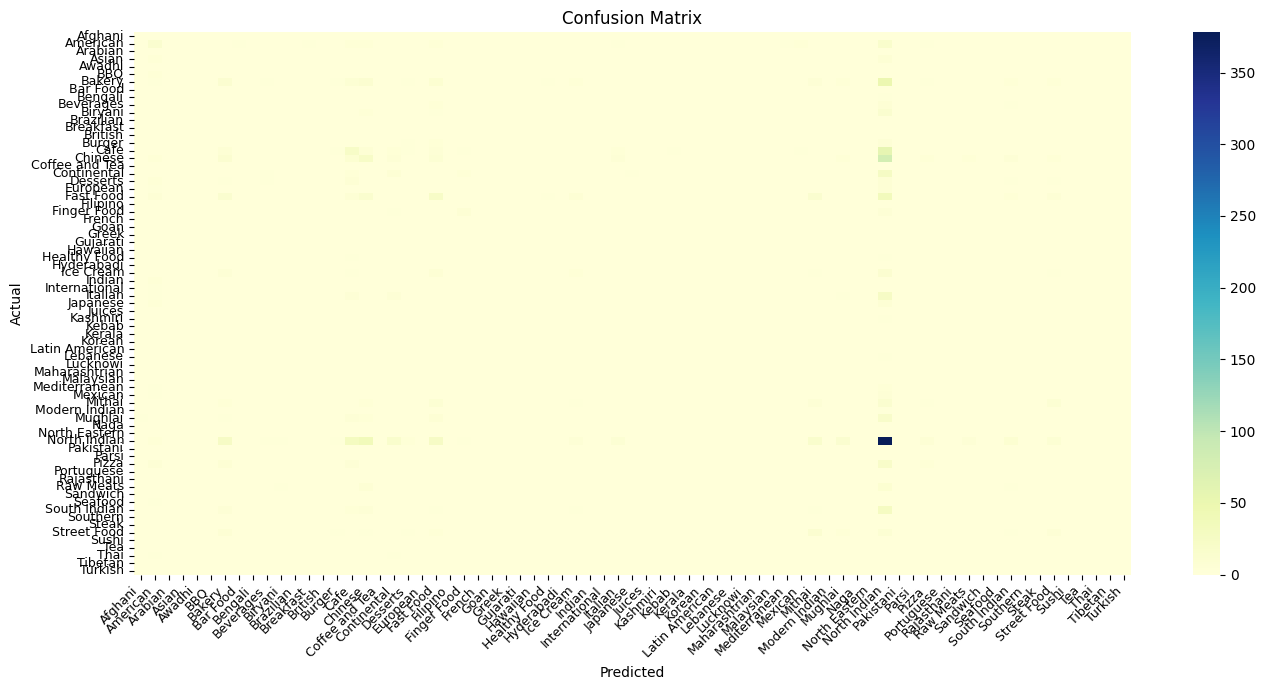

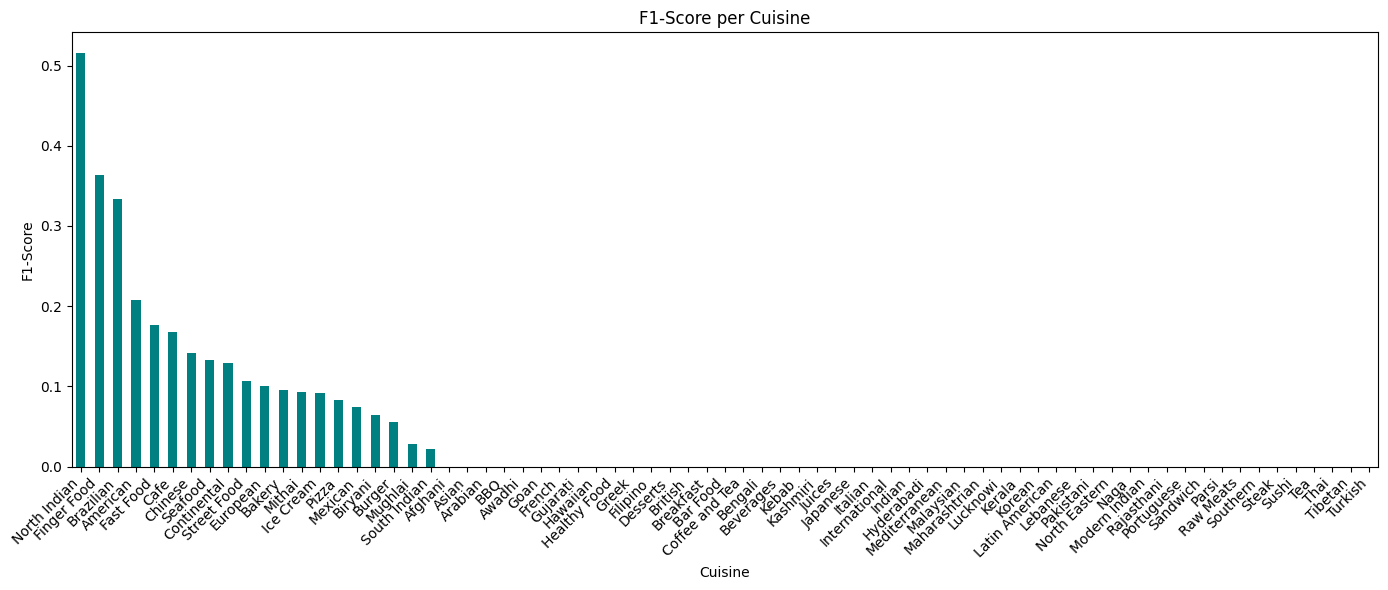

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------- 1. Load and Preprocess --------------------
# Load dataset
df = pd.read_csv("D:\\intern\\Dataset .csv")
print("Dataset loaded.")

# Drop rows with missing values
df = df.dropna()
print(f"Shape after dropping missing values: {df.shape}")

# Extract primary cuisine (use only first cuisine from list)
df['Primary_Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())

# Remove cuisines with fewer than 5 restaurants
cuisine_counts = df['Primary_Cuisine'].value_counts()
valid_cuisines = cuisine_counts[cuisine_counts >= 5].index
df = df[df['Primary_Cuisine'].isin(valid_cuisines)]
print(f"Shape after filtering rare cuisines: {df.shape}")

# Encode 'Locality' and 'Primary_Cuisine'
le_locality = LabelEncoder()
df['Locality_Encoded'] = le_locality.fit_transform(df['Locality'])

le_cuisine = LabelEncoder()
df['Cuisine_Label'] = le_cuisine.fit_transform(df['Primary_Cuisine'])

# Select features and target
features = ['Average Cost for two', 'Votes', 'Aggregate rating', 'Locality_Encoded']
X = df[features]
y = df['Cuisine_Label']

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------- 2. Train-Test Split --------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print("Train-test split complete.")

# -------------------- 3. Model Training --------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Random Forest model trained.")

# -------------------- 4. Evaluation --------------------
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy:.4f}\n")

# Classification report
report = classification_report(y_test, y_pred, target_names=le_cuisine.classes_,zero_division=0)
print("📊 Classification Report:\n")
print(report)

# -------------------- 5. Confusion Matrix --------------------
plt.figure(figsize=(14, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap='YlGnBu', xticklabels=le_cuisine.classes_, yticklabels=le_cuisine.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

# -------------------- 6. Per-Cuisine Performance (F1 Score) --------------------
report_dict = classification_report(y_test, y_pred, target_names=le_cuisine.classes_, output_dict=True,zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.iloc[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Plot F1 scores
plt.figure(figsize=(14, 6))
report_df['f1-score'].sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("F1-Score per Cuisine")
plt.xlabel("Cuisine")
plt.ylabel("F1-Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
